In [73]:
# 导入各种包
import pandas as pd
%pylab
%matplotlib inline
import seaborn as sns
import re

sns.set()

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [74]:
df = pd.read_csv("D:/anydata/data/hair_dryer.tsv", sep='\t') # 读取tsv格式数据
df.head()#显示前5行

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,34678741,R9T1FE2ZX2X04,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,5,0,0,N,Y,Works great,Works great!,8/31/2015
1,US,11599505,RE36JAD5V53PO,B0009XH6V4,670161917,andis micro turbo hair dryer,Beauty,4,0,0,N,Y,I love travel blow dryers because they are eas...,"This dries my hair faster that bigger, more po...",8/31/2015
2,US,2282190,RIDHM8B7SCCV3,B0007NZPY6,16483457,conair pro hair dryer,Beauty,5,0,1,N,Y,Five Stars,Love this dryer!,8/31/2015
3,US,43669858,R14QGWPCHU9LSE,B00BB8ZIW0,253917972,remington silk ceramic professional hair dryer,Beauty,5,0,0,N,Y,Five Stars,styling hair in style,8/31/2015
4,US,107098,R35BHQJHXXJD59,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,4,0,0,N,N,I think's great. The cord length is perfect,I just got this last week. I think's great. Th...,8/31/2015


In [75]:
df.info() # 查看数据缺省情况，很好，没有缺省值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11470 entries, 0 to 11469
Data columns (total 15 columns):
marketplace          11470 non-null object
customer_id          11470 non-null int64
review_id            11470 non-null object
product_id           11470 non-null object
product_parent       11470 non-null int64
product_title        11470 non-null object
product_category     11470 non-null object
star_rating          11470 non-null int64
helpful_votes        11470 non-null int64
total_votes          11470 non-null int64
vine                 11470 non-null object
verified_purchase    11470 non-null object
review_headline      11468 non-null object
review_body          11470 non-null object
review_date          11470 non-null object
dtypes: int64(5), object(10)
memory usage: 1.3+ MB


# 问题一
分析星级、评论以及帮助等级

In [76]:
'''
文本处理
1.将标题和主体合并得到评论（review）
2.去掉符号
3.分割得到词汇并转换成小写
4.去掉停词
'''
#停词表
stopwords_list = [line.rstrip() for line in open('D:/anydata/data/baidu_stopword.txt')]

def clean_text(text):
    text=re.sub('[^a-zA-Z]',' ',str(text)) #去掉符号，只要字母
    words=text.lower().split() # 小写并且分割成单词
    
    words=[w for w in words if w not in stopwords_list] # 去掉停词
    return ' '.join(words) # 返回字符串

df["review"] = df.review_headline + " " + df.review_body# 清洗
df['review'] = df.review.apply(clean_text) # 清洗

## 星级
将星级分成三部分，积极，中立和消极，分别看出现的高频词汇和品牌

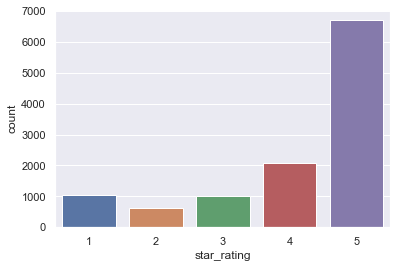

In [77]:
# 星级分布
sns.countplot(x=df["star_rating"], data = df)

In [78]:
#将星级分成几部分(1:好评, 0:中评, -1:差评)
df.loc[df['star_rating'] < 3, 'star_sentiment'] = -1
df.loc[df['star_rating'] == 3, 'star_sentiment'] = 0
df.loc[df['star_rating'] > 3, 'star_sentiment'] = 1

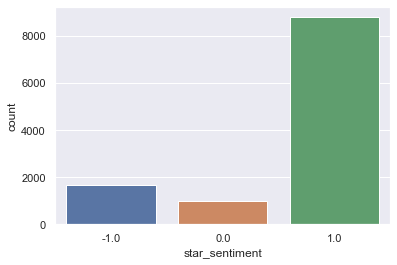

In [79]:
sns.countplot(x=df["star_sentiment"], data = df)
# 可以看出好评占多数

In [80]:
def getTxt(ss):
    '''ss是包含字符串的数组，返回一个字符串'''
    txt = ""
    for i in range(len(ss)):
        txt += ss[i]
    return txt

def countWord(txt):
    '''txt:一个长的字符串，返回前20个高频词汇'''
    txtArr = txt.split()
    counts = {}
    for word in txtArr:
        counts[word] = counts.get(word, 0) + 1

    countsList = list(counts.items())
    countsList.sort(key=lambda x:x[1], reverse=True)#按次数从大到小排序

    '''打印
    for i in range(20):
        word, count = countsList[i]
        print('{0:<10}{1:>5}'.format(word,count))
    '''
    return countsList[:20]

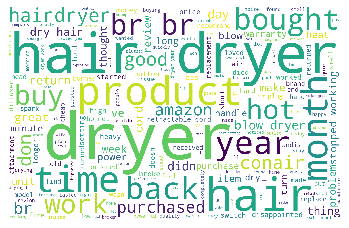

In [88]:
# 星级低的高频词汇
from wordcloud import WordCloud
txt = getTxt(df.loc[df['star_sentiment'] == -1, 'review'].values)
wordcloud = WordCloud(
        background_color="white", #设置背景为白色，默认为黑色
        width=1500,              #设置图片的宽度
        height=960,              #设置图片的高度
        margin=10               #设置图片的边缘
        ).generate(txt)
plt.imshow(wordcloud)
plt.axis("off")
wordcloud.to_file("star_negative.png") # 保存

# 打印前20个词
star_negative_word = countWord(txt)

star_negative_title = df.loc[df['star_sentiment'] == -1, 'product_title'].value_counts()[:10]

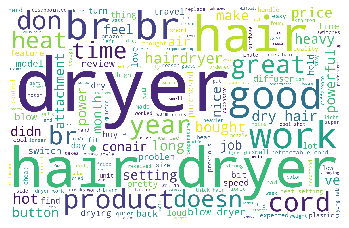

In [89]:
# 星级中等的
txt = getTxt(df.loc[df['star_sentiment'] == 0, 'review'].values)
wordcloud = WordCloud(
        background_color="white", #设置背景为白色，默认为黑色
        width=1500,              #设置图片的宽度
        height=960,              #设置图片的高度
        margin=10               #设置图片的边缘
        ).generate(txt)
plt.imshow(wordcloud)
plt.axis("off")
wordcloud.to_file("star_neutral.png") # 保存
# 取20个词
star_neutral_word = countWord(txt)
star_neutral_title = df.loc[df['star_sentiment'] == 0, 'product_title'].value_counts()[:10]

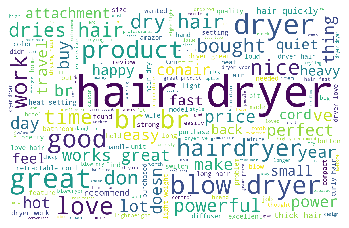

In [90]:
# 星级高的
# 星级中等的
txt = getTxt(df.loc[df['star_sentiment'] == 1, 'review'].values)
wordcloud = WordCloud(
        background_color="white", #设置背景为白色，默认为黑色
        width=1500,              #设置图片的宽度
        height=960,              #设置图片的高度
        margin=10               #设置图片的边缘
        ).generate(txt)
plt.imshow(wordcloud)
plt.axis("off")
wordcloud.to_file("star_positive.png") # 保存
# 前20个词
star_positive_word = countWord(txt)
star_positive_title = df.loc[df['star_sentiment'] == 1, 'product_title'].value_counts()[:10]

### 评论
将评论分成三部分，积极，中立和消极，分别看出现的高频词汇和品牌

In [91]:
# 用textblob分析文本极性
from textblob import TextBlob 

def get_sentiment(text): 
    ''' 
    调用TextBlob，返回-1 or  0 or  1
    '''
    analysis = TextBlob(text) 
    return np.sign(analysis.sentiment.polarity)

df['review_sentiment'] = df.review.apply(get_sentiment) # 调用函数

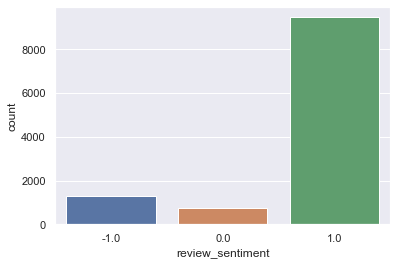

In [92]:
# 分布
sns.countplot(x=df["review_sentiment"], data = df)

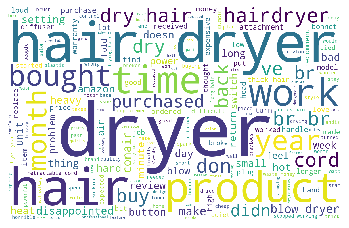

In [93]:
# 评论消极的
txt = getTxt(df.loc[df['review_sentiment'] == -1, 'review'].values)
wordcloud = WordCloud(
        background_color="white", #设置背景为白色，默认为黑色
        width=1500,              #设置图片的宽度
        height=960,              #设置图片的高度
        margin=10               #设置图片的边缘
        ).generate(txt)
plt.imshow(wordcloud)
plt.axis("off")
wordcloud.to_file("review_negative.png") # 保存
# 打印前20个词
review_negative_word = countWord(txt)
review_negative_title = df.loc[df['review_sentiment'] == -1, 'product_title'].value_counts()[:10]

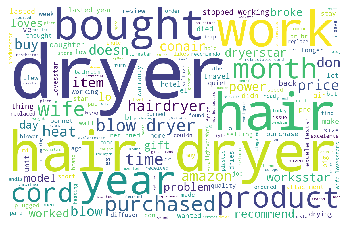

In [94]:
# 评论中立的
txt = getTxt(df.loc[df['review_sentiment'] == 0, 'review'].values)
wordcloud = WordCloud(
        background_color="white", #设置背景为白色，默认为黑色
        width=1500,              #设置图片的宽度
        height=960,              #设置图片的高度
        margin=10               #设置图片的边缘
        ).generate(txt)
plt.imshow(wordcloud)
plt.axis("off")
wordcloud.to_file("review_neutral.png") # 保存
# 打印前20个词
review_neutral_word = countWord(txt)
review_neutral_title = df.loc[df['review_sentiment'] == 0, 'product_title'].value_counts()[:10]

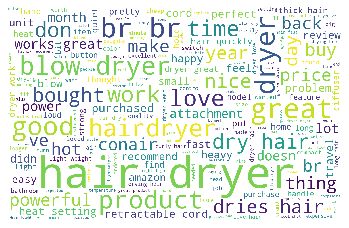

In [95]:
# 评论积极的
txt = getTxt(df.loc[df['review_sentiment'] == 1, 'review'].values)
wordcloud = WordCloud(
        background_color="white", #设置背景为白色，默认为黑色
        width=1500,              #设置图片的宽度
        height=960,              #设置图片的高度
        margin=10               #设置图片的边缘
        ).generate(txt)
plt.imshow(wordcloud)
plt.axis("off")
wordcloud.to_file("review_positive.png") # 保存
# 打印前20个词
review_positive_word = countWord(txt)
review_positive_title = df.loc[df['review_sentiment'] == 1, 'product_title'].value_counts()[:10]

# 帮助等级
将帮助等级分成两部分，有用和没用，分别看出现的高频词汇和品牌

In [96]:
# 帮助等级分成有用和没用
df.loc[df['helpful_votes'] == 0, 'helpful_votes'] = 0
df.loc[df['helpful_votes'] > 0, 'helpful_votes'] = 1

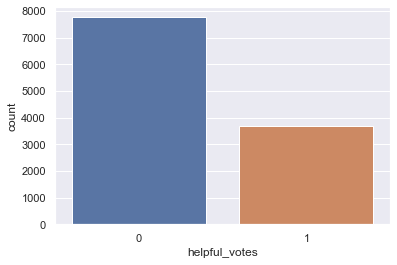

In [97]:
sns.countplot(x="helpful_votes", data = df)

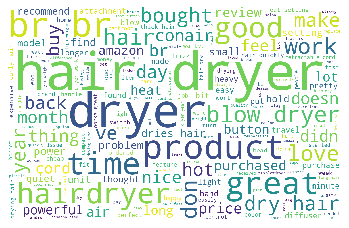

In [98]:
# 帮助有用的
txt = getTxt(df.loc[df['helpful_votes'] == 1, 'review'].values)
wordcloud = WordCloud(
        background_color="white", #设置背景为白色，默认为黑色
        width=1500,              #设置图片的宽度
        height=960,              #设置图片的高度
        margin=10               #设置图片的边缘
        ).generate(txt)
plt.imshow(wordcloud)
plt.axis("off")
wordcloud.to_file("helpful.png") # 保存
# 打印前20个词
helpful_word = countWord(txt)
helpful_title = df.loc[df['helpful_votes'] == 1, 'product_title'].value_counts()[:10]

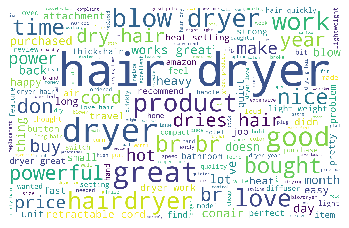

In [99]:
# 帮助没用的
txt = getTxt(df.loc[df['helpful_votes'] == 0, 'review'].values)
wordcloud = WordCloud(
        background_color="white", #设置背景为白色，默认为黑色
        width=1500,              #设置图片的宽度
        height=960,              #设置图片的高度
        margin=10               #设置图片的边缘
        ).generate(txt)
plt.imshow(wordcloud)
plt.axis("off")
wordcloud.to_file("unhelpful.png") # 保存
# 打印前20个词
unhelpful_word = countWord(txt)
unhelpful_title = df.loc[df['helpful_votes'] == 0, 'product_title'].value_counts()[:10]

## 综合上面的来看
分析星级，评论，帮助等级得到了一些高频词汇和前十的品牌，整理如下：

In [ ]:
def combine(word_list, title_list):
    

In [ ]:
## 高频词汇
negative_word = 
negative_title = 
positive_word = 
positive_title = 

# 第二问

### a)基于对阳光公司影响最大的评级(rating)和评论(review)这两个指标，确定一个数据衡量(measures)方法
    根据(星级,评论)三个标准判断用户的满意程度.星级分1-5分,划分成-1, 0, 1; 评论分-1, 0, 1;如何描述用户满不满意呢?总的来说,星级越高,帮助等级越高,评分越高,用户越满意;可以给出一个满意程度的模型,比如简单的将前面两个的得分加起来(暂时没想到什么好方法, 具体可能要知道textblob的具体原理)

In [103]:
df['satisfied_score'] = df['star_sentiment'] + df['review_sentiment']

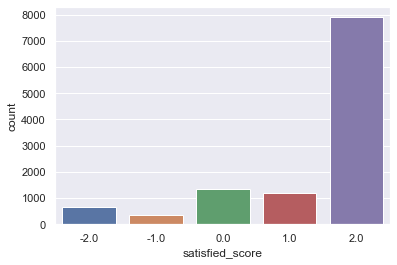

In [104]:
sns.countplot(x=df["satisfied_score"], data = df)

### b)基于那些“能预测或暗示产品在市场上声誉增加或减少的”数据，来分析讨论“基于时间的度量方法(measures)和模式(patterns)”；
	从时间来看产品的声誉变化, 这里的数据有十多年,选择的时间段应该是月份或者年份.从第一问得到用户的满意程度,观察满意程度随时间变化即可.横坐标:时间(单位:年/月份);纵坐标:满意程度(单位:1)

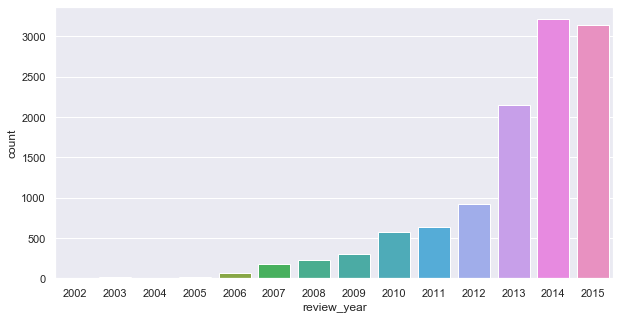

In [105]:
#先简单的年份开始吧
def get_year(date):
    return date.split("/")[-1]

df['review_year'] = df.review_date.apply(get_year)

# 销量
plt.figure(figsize=(10,5))
sns.countplot(x="review_year", data=df)


In [215]:
reputation_list = []
for year in set(df['review_year'].values):
    positive_number = np.sum(df.loc[df['review_year'] == year, 'satisfied_score'] > 0)
    rate = positive_number / sum(df['review_year'] == year)
    reputation_list.append([year, rate])
reputation_list = np.array(reputation_list)
reputation_list.sort(axis = 0) # 将年份排列

<BarContainer object of 14 artists>

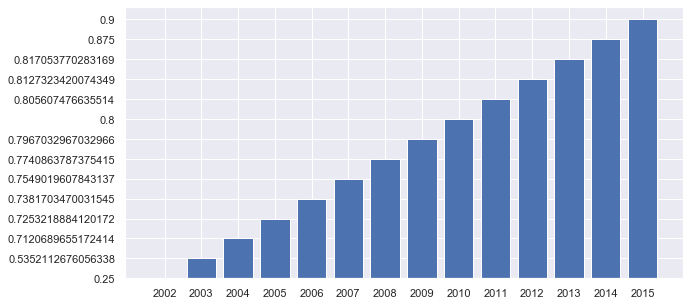

In [216]:
plt.figure(figsize=(10 ,5))
plt.bar(reputation_list[:,0], reputation_list[:,1])
# 可以看到声誉一直在增长

### c)以寻找一个“暗示或预示产品的成功或失败的”**潜在性**的方法为目的，确定一套“基于文本(text-based)和评级(rating-based)的综合度量方法”；
	确定文本(text-based)和评级(rating-based)之间的最佳权重,来预测产品是否会成功.初步的想法是用这两个指标,通过决策树模型拟合,计算重要程度,把重要程度作为权重.产品成败的潜在性就看销量增加还是减少.

In [223]:
# 分析两者关联性
df[['star_sentiment', 'review_sentiment']].corr()

,star_sentiment,review_sentiment
star_sentiment,1.000000,0.403904
review_sentiment,0.403904,1.000000


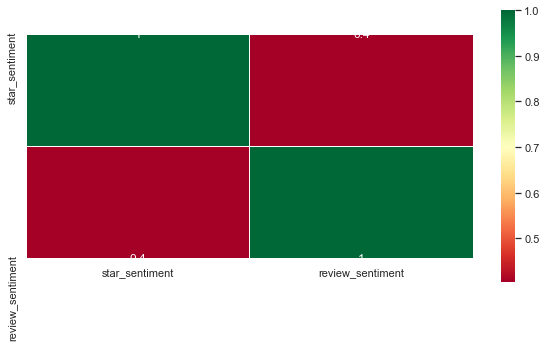

In [224]:
# 可视化看看
plt.figure(figsize=(10, 5))
sns.heatmap(df[['star_sentiment', 'review_sentiment']].corr(),linewidths=0.1,vmax=1.0,square=True, cmap='RdYlGn', linecolor='white',annot=True)
plt.show()

In [ ]:
#随机森林得到的特征重要性【我们要的权重】..今天先到这儿了2020/3/8/1:05
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

train = 
labels = df.star_sentiment.values

feature_importtances = []
plt.figure(figsize=(10, 20))
for label_name in ['quit']:
    X_train, X_test, y_train, y_test = train_test_split(train, labels)

    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    print(label_name+"--Features sorted by their score:")
    print(" + ".join("%s * %s" % (round(coef, 3), name)
                        for coef, name in zip(rf.feature_importances_, feature_names)))
    
    plt.subplot(311+len(feature_importtances))
    plt.title('quit')
    y_pred = rf.predict(X_test)
    plt.barh(range(len(rf.feature_importances_)), rf.feature_importances_)
    plt.yticks(range(len(feature_names)), feature_names)
    plt.xlabel('Relative Importance')
    
    feature_importtances.append(rf.feature_importances_.T) 
feature_importtances

### d)特定的星级是否会引起更多的评论？例如，客户看到一连串的差评，他是否会更倾向于写一个差评呢？
根据时间段, 分析星级对接下来的评论的影响.查看有连续差评的时间段中的评论

In [ ]:
# 连续好评


In [ ]:
#连续差评

### e)特定质量的文本评论(text-based reviews)是否和评级(rating)有强关联性呢？例如，“对产品很满意！”，“对产品很失望！”
	特定文本是否与评级有很强的关联.看给出高评分的的用户的评论中的高频词汇.

In [29]:
# 星级和评论的相关系数
df[['review_sentiment', 'star_rating']].corr()

,review_sentiment,star_rating
review_sentiment,1.00000,0.40668
star_rating,0.40668,1.00000


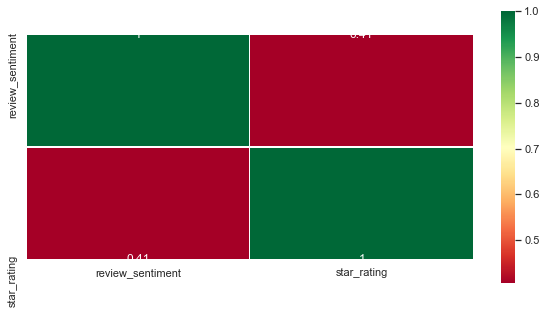

In [30]:
# 星级和评论的相关系数, 可视化看看
plt.figure(figsize=(10, 5))
sns.heatmap(df[['review_sentiment', 'star_rating']].corr(),linewidths=0.1,vmax=1.0,square=True, cmap='RdYlGn', linecolor='white',annot=True)
plt.show()

## 顾客id

In [31]:
# 这个人买了4次， 购买次数最多的之一。还每次都给了差评。。。这是多大的仇恨。。。
df[df.customer_id == 2567729]

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review,star_sentiment,review_sentiment
4875,US,2567729,R1ZFBD1STGZW4K,B00006IV22,357308868,conair 1875 watt dual voltage folding handle h...,Beauty,1,0,3,N,N,Please dont trust Conair Products,Conair Hair dryers are the worst. It will work...,7/20/2014,dont trust conair products conair hair dryers ...,-1.0,-1.0
4883,US,2567729,R1O1R97MAQ3LBC,B00132ZG3U,758099411,conair 1875 watt tourmaline ceramic hair dryer,Beauty,1,1,2,N,N,Please dont trust Conair,Conair Hair products are the worst. It will wo...,7/20/2014,dont trust conair conair hair products worst w...,-1.0,-1.0
4884,US,2567729,RIJASRLH65OWX,B001QTW2FK,328811288,conair minipro tourmaline ceramic styler / hai...,Beauty,1,3,3,N,N,Dont Trust Conair,Conair Hair products are the worst. It will wo...,7/20/2014,dont trust conair conair hair products worst w...,-1.0,-1.0
4886,US,2567729,R1RG0D3451MOS1,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,Beauty,1,0,0,N,N,Please dont trust Conair,Conair Hair products are the worst. It will wo...,7/20/2014,dont trust conair conair hair products worst w...,-1.0,-1.0


In [32]:
def get_bought_times(id):
    global df
    return len(df[df.customer_id == id])

In [33]:
# 每个顾客的购买次数
df['bought_times'] = df.customer_id.apply(get_bought_times)

In [34]:
df['bought_times'].value_counts()

1    11235
2      212
3       15
4        8
Name: bought_times, dtype: int64

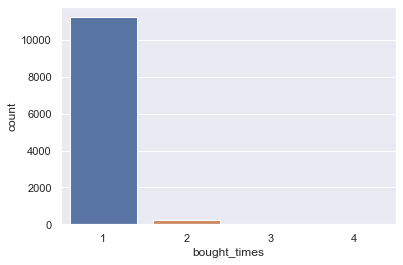

In [35]:
sns.countplot(x="bought_times", data = df)

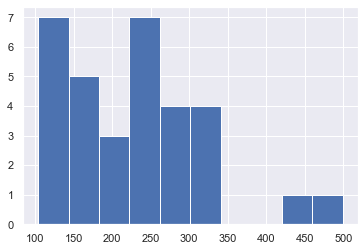

In [36]:
df.helpful_votes[df.helpful_votes > 100].hist() # 帮助点赞数大于100的分布，

In [38]:
df[['vine', 'helpful_votes']].corr() # 奇怪， 竟然相关性不高

,vine,helpful_votes
vine,1.000000,0.006468
helpful_votes,0.006468,1.000000


In [37]:
# 分析下是不是vine 对帮助等级影响大
df.loc[df['vine'] == 'Y', 'vine'] = 1
df.loc[df['vine'] == 'N', 'vine'] = 0

In [55]:
def getTxt(ss):
    '''ss是包含字符串的数组，返回一个字符串'''
    txt = ""
    for i in range(len(ss)):
        txt += ss[i]
    return txt
getTxt(df.loc[df['review_sentiment'] == -1, 'review'].values)

'girlfriend loves quiet bought replace girlfriend stupid loud blow dryer woke morning thing easier earshot air ve blow dryer year finally started smoking sparking bad caught fire didn turn months longer ve noticed st turn smells hot air flow low fiddling heat controls cool button gradually begin blow normal flow ve cheaper blow dryers past minimum yrs ts weekend andis closed ll attempt contact refund repair replace unit note website half blow dryers discontinued hmm ll update review hear don hear back companystars bonnet smallannoying deal cold button stuck replaced annoying dealpiece crap broke time piece crapstars ends pink expecteddiffuser made curls frizzy diffuser made curly hair frizzy messydisappointed packaging product arrived open box cord pushed box looked returned arrived quickly works small easy travelbad bad dryer heavy sleek doesn burn hairdryer dryer isn quiet heavy bigger bit unwieldy unpracticed hands dries thick coarse shoulder length hair faster device leaves hair no

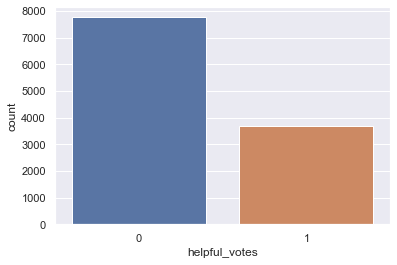

In [40]:
sns.countplot(x="helpful_votes", data = df)

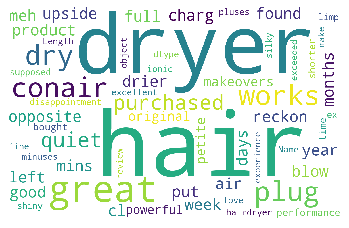

In [41]:
# 星级高的
wordcloud = WordCloud(
        background_color="white", #设置背景为白色，默认为黑色
        width=1500,              #设置图片的宽度
        height=960,              #设置图片的高度
        margin=10               #设置图片的边缘
        ).generate(str(df.loc[df['helpful_votes'] == 1, 'review']))
plt.imshow(wordcloud)
plt.axis("off")

wordcloud.to_file("hairdryer_helpful.png")

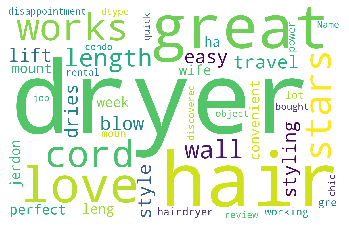

In [42]:
# 星级高的
wordcloud = WordCloud(
        background_color="white", #设置背景为白色，默认为黑色
        width=1500,              #设置图片的宽度
        height=960,              #设置图片的高度
        margin=10               #设置图片的边缘
        ).generate(str(df.loc[df['helpful_votes'] == 0, 'review']))
plt.imshow(wordcloud)
plt.axis("off")

wordcloud.to_file("hairdryer_unhelpful.png")

In [43]:
# 星级和评论的相关系数
df[['review_sentiment', 'star_rating', 'helpful_votes']].corr()

,review_sentiment,star_rating,helpful_votes
review_sentiment,1.000000,0.406680,-0.058501
star_rating,0.406680,1.000000,-0.195119
helpful_votes,-0.058501,-0.195119,1.000000


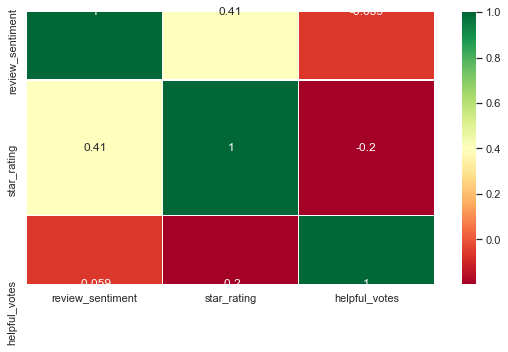

In [44]:
# 星级和评论的相关系数, 可视化看看
plt.figure(figsize=(10, 5))
sns.heatmap(df[['review_sentiment', 'star_rating', 'helpful_votes']].corr(),linewidths=0.1,vmax=1.0,square=True, cmap='RdYlGn', linecolor='white',annot=True)
plt.show()

In [45]:
df.loc[df['verified_purchase'] == 'Y', 'verified_purchase'] = 1
df.loc[df['verified_purchase'] == 'N', 'verified_purchase'] = 0

In [46]:
df[['review_sentiment', 'star_rating', 'helpful_votes', 'verified_purchase']].corr()

,review_sentiment,star_rating,helpful_votes,verified_purchase
review_sentiment,1.000000,0.406680,-0.058501,0.039970
star_rating,0.406680,1.000000,-0.195119,0.127246
helpful_votes,-0.058501,-0.195119,1.000000,-0.174983
verified_purchase,0.039970,0.127246,-0.174983,1.000000


In [47]:
df.verified_purchase.value_counts()

1    9811
0    1659
Name: verified_purchase, dtype: int64

# 第二问